# Instructions for running DART and other code for PRIMARY

In [ ]:
%pylab
%matplotlib inline

# 0. Contents

[1. Introduction](#1.-Introduction)

[2. Turbid medium model](#2.-Turbid-medium-model)

[3. Turbid medium model with DEM](#3.-Turbid-medium-model-with-DEM)

[4. Turbid medium model with DEM and stems](#4.-Turbid-medium-model-with-DEM-and-stems)

[5. Explicit 3D model](#5.-Explicit-3D-model)

[6. Explicit 3D-model, leaf-off](#6.-Explicit-3D-model,-leaf-off)

[7. Editing .xml files](#7.-Editing-.xml-files)

[8. Read and manipulate .obj meshes with trimesh](#8.-Read-and-manipulate-.obj-meshes-with-trimesh)

## 1. Introduction
This notebook outlines methods used in the 3D radiative tranfer model component of the PRIMARY project. 

The DART radiative transfer model was used simulations, access and licencing can be found on the [DART](https://dart.omp.eu/#/) website.

The work package makes extensive use of the 3D models presented in [Realistic Forest Stand Reconstruction from Terrestrial LiDAR for Radiative Transfer Modelling](https://www.mdpi.com/2072-4292/10/6/933/htm) and [Chang Li](https://www.ugent.be/bw/environment/en/research/cavelab/contact/liu-chang)'s conversion of the models to `.obj` format (available from `add-DART` branch on the [wytham-woods-3d-model](https://bitbucket.org/tree_research/wytham_woods_3d_model/src/add_dart/) BitBucket). The Wytham.db sepctral database (in `DART_models/3D-explicit model/Spec/Wytham.db` of the repository) is also required to run the simulations. 

For this project, DART was run on a Windows 10 machine with 128 gb of RAM. DART was run from the GUI and files were either modified using the DART options (Parameters > Editor), using the Windows Code Writer software or with Python (see below).

DART uses a directory structure to organise simulations

```
DART
├── bin
├── tools
├── database 
|   └── Lambertian_mineral.db # used for the soil spectrum
└── user_data 
    └── log_parameters 
    └── database # home for 3D models and spectral databases
    |   ├── 3D_models 
    |   |   ├── tree_1.obj 
    |   |   ├── tree_X.obj 
    |   |   └── dem.obj 
    |   └── wytham.db # spectral database
    └── simulations # home for simulations where
        ├── SIM1 
        |   ├── inputs 
        |   |   ├── atmosphere.xml # not used
        |   |   ├── coeff_diff.xml # can be edited in GUI
        |   |   ├── coeff_diff_template.xml # used to edit coeff_diff.xml           
        |   |   ├── directions.xml # edit in GUI
        |   |   ├── inversion.xml # not used
        |   |   ├── maket.xml # edit in GUI
        |   |   ├── object_3d.xml # see below        
        |   |   ├── phase.xml # edit in the GUI
        |   |   ├── plots.xml # can be edited in GUI      
        |   |   ├── plots_template.xml # see below                    
        |   |   ├── trees.xml # not used
        |   |   ├── urban.xml # not used
        |   |   └── water.xml # not used   
        |   └── outputs # created automatically on run               
        ├── SIM2 
        └── SIMX 
```

##### `coeff_diff.xml` and `coeff_diff_template.xml`
Stores the <i>Optical and temperatures properties</i>, this is where the `wytham.db` spectral database is linked to the leaf and wood facets as well as ground. 
[This](#Edit-coeff_diff.xml) code changes updates the link e.g. this can make all wood surfaces black.

##### `directions.xml`
Stores the sun and view directions, this is edited in the GUI. For PRIMARY simulations the date was used to determine sun angles (either 27/6/2018 for leaf-on or 28/12/2017 for leaf-off); to correctly orientate the scenes a _Sun azimuth offset_ of 90$^o$ was required. VZA was 3$^o$ and VAA was 263$^o$ for all simulations where again this had to be manipulated for correct scene orientation. 

##### `maket.xml`
Stores general information about the scene. Scenes are modelled as
- an area of 100 m x 100 m (equivalent to the 3D explicit scene). 
- infinite slope.

These optionas are edited in the GUI.

##### `object_3d.xml` and `object_3d_template.xml`
Stores information on user-defined 3D objects used in the scene e.g. trees and DEM.</p>
Trees can be imported in the GUI using 
- `Earth Scene: 3D imported object` > `Punctual objects` to import a sinlge element. This can be useful to import a DEM in combination with a turbid medium.
- `Earth Scene: 3D imported object` > `Object fields` + `Add` + `Field` then specifying a text file with a list of 3D objects e.g. `Field.txt`.

Importing objects generates the `object_3d.xml` file which can then be manipulated using [this](#Edit%object_3d.xml) function e.g. for removing leaves.

##### `plots.xml` and `plots_template.xml`
Stores information on turbid medium representation of leaves. This can be edited in the GUI; however, when there are many plots with different spectifications e.g. LAI and height, it is convenient to use [this](#Edit%plots.xml) function.

## 2. Turbid medium model

Ths simpilest implementation is a trubrbid medium model where leaves are represented are placed randomly in the scene. Scene characteristics are:
- Scene LAI is 3.8
- Scene height is 30 m
- Leaf angle distribution is planophile
- Leaf size is 0.02 m<sup>2</sup>
- The <i>LEAF_NA</i> leaf spectra was used for the leaves
- The <i>clay_brown</i> from the _Lambertian_mineral.db_ was used for the ground 

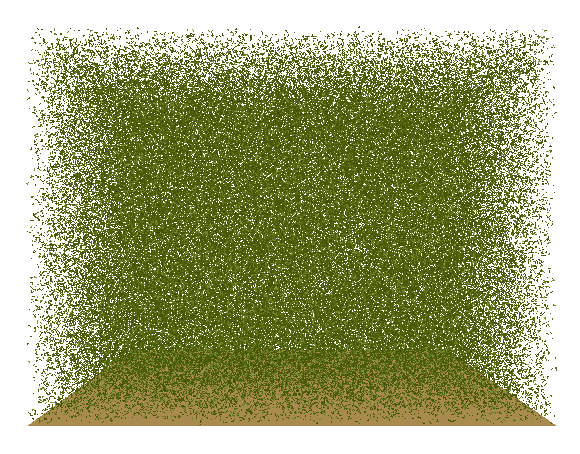

## 3. Turbid medium model with DEM

Same as [above](#Turbid%medium%model) except a DEM is imported. This is done using the `Earth Scene: 3D imported object` > `Punctual objects` where the _DEM Mode_ option is set to `Used as DEM`. 

To correctly attribute canopy height, first the [tree .obj files were read in](#Create-leaf-facet-database) to estimate canopy height, this was then used to generate a set of plots with [plots.xml](#Edit-plots.xml).

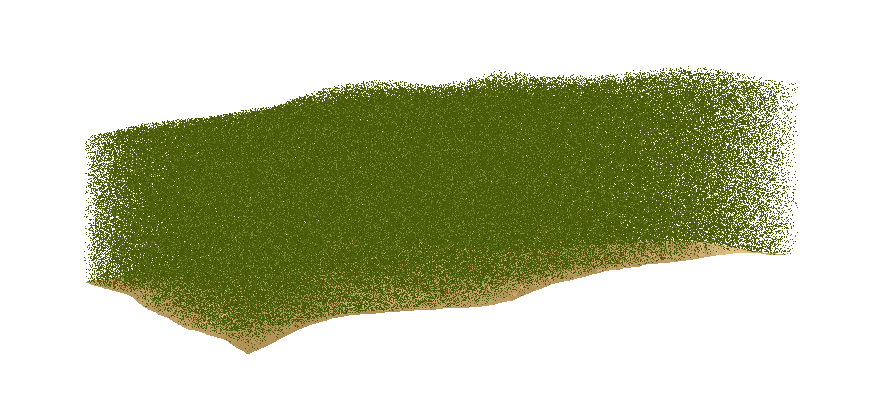

## 4. Turbid medium model with DEM and stems

Same as [above](#3.-Turbid-medium-model-with-DEM) except leaf-off stems are added. This achieved by importing all stems (`Earth Scene: 3D imported object` > `Object fields` + `Add` + `Field` then specifying a text file with a list of 3D objects e.g. `Field.txt`), then editing the `object_3d.xml` to remove the leaves (see [here](#Edit-object_3d.xml)).

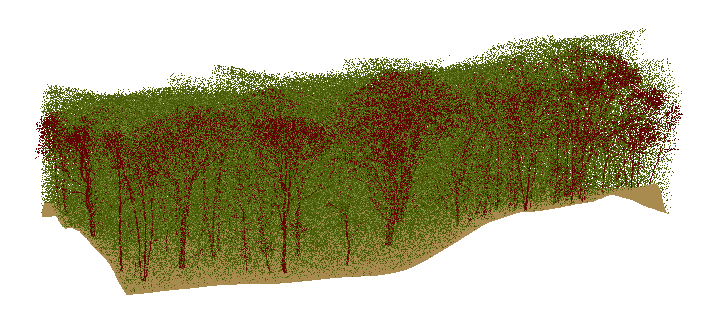

## 5. Explicit 3D model

A model where the explicit 3D tree models are used inlcuding their leaves. An understorey layer can be added using the [plots.xml](#Edit-plots.xml)

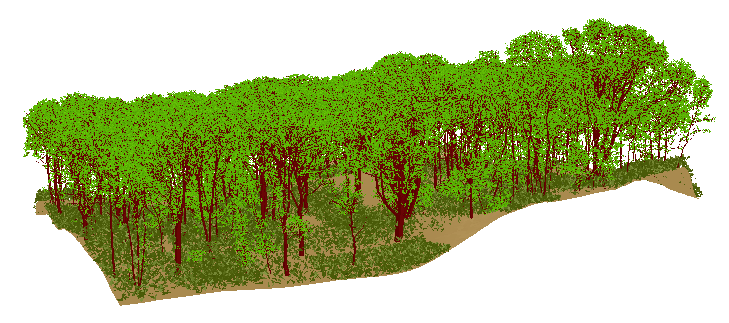

## 6. Explicit 3D model, leaf-off

Same as [above](#4.-Explicit-3D-model) but with the leaves removed. This can be achieved by editing the [object_3d.xml](#Edit-object_3d.xml)

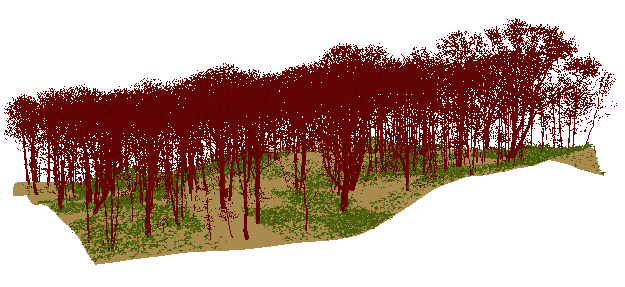

## 7. Editing `.xml` files

### Edit-coeff_diff.xml

In [ ]:
from lxml import etree as et

In [ ]:
file = r'C:/DART/user_data/simulations/SIMX/input/coeff_diff_template.xml'
tree = et.parse(file)
root = tree.getroot()

In [ ]:
# replace all wood spectra with the BLACK spectral signature
# this only replaces the LINK between the wytham.db and the coeff_diff.xml
# i.e. it replaces the leaf spectra with the BLACK spectra

for grp in root.iter():
    if grp.tag == 'LambertianMulti' and grp.get('ModelName').endswith('_leaf'):
        grp.set('ModelName', 'BLACK')     

In [ ]:
tree.write(file.replace('_template', '')) # write to coeff_diff.xml

### Edit object_3d.xml

In [ ]:
from lxml import etree as et

In [ ]:
file = r'C:/DART/user_data/simulations/SIMX/input/object_3d.xml'
tree = et.parse(file)
root = tree.getroot()

In [ ]:
# delete all entries named Leaves

to_delete = []

for grp in root.iter():
    if grp.get('name') == 'Leaves':
        to_delete.append(grp)
        
XXX = [e.getparent().remove(e) for e in to_delete]

In [ ]:
tree.write(file, pretty_print=True)

### Edit plots.xml

In [ ]:
from lxml import etree as et
from copy import deepcopy
import numpy as np

In [ ]:
file = r'C:/DART/user_data/simulations/SIMX/input/plots_template.xml'
tree = et.parse(file)
root = tree.getroot()

In [ ]:
Plots = root[0]
# template xml snippets
UI_element = root[0][1]
LAI_element = root[0][2]

In [ ]:
# generate 10 m x 10 m plots of understorey vegetation where 
# height and LAI are drawn from a normal distribution

X, Y = np.meshgrid(np.arange(0, 100, 10), np.arange(0, 100, 10))
X, Y = X.flatten(), Y.flatten()

for x, y in zip(X, Y):
    element = deepcopy(LAI_element)
    element[0][0].set('x', f'{x}')
    element[0][0].set('y', f'{y}')
    element[0][1].set('x', f'{x + 10}')
    element[0][1].set('y', f'{y}')
    element[0][2].set('x', f'{x + 10}')
    element[0][2].set('y', f'{y + 10}')
    element[0][3].set('x', f'{x}')
    element[0][3].set('y', f'{y + 10}')
    
    H = np.random.normal(loc=1.5)
    H = 0 if H < 0 else H
    LAI = 0 if H == 0 else np.random.normal(loc=1.5)
    LAI = 0 if LAI < 0 else LAI
    
    for i, ch in enumerate(element[1].iterchildren()):
        if ch.tag == 'LAIVegetation':
            ch.set('LAI', f'{LAI}')
        elif ch.tag == 'VegetationOpticalPropertyLink':
            ch.set('ident', f'leaf_NA_turbid')
        elif ch.tag == 'VegetationGeometry':
            ch.set('height', f'{H}')
        else:
            pass

    Plots.append(element)
    del element

In [ ]:
# generates 10 m x 10 m plots of canopy height with
# constant LAI where canopy height is determined by a CHM

X, Y = np.meshgrid(np.arange(0, 100, 10), np.arange(0, 100, 10))
X, Y = X.flatten(), Y.flatten()

# this db is generated from reading in leaf facets - see below
cp = pd.read_pickle('C:/DART/user_data/database/leaf_area_voxels_5m.pickle') 
cpp = cp.groupby(['xx', 'yy']).z_cor.max().reset_index()

for x, y in zip(X, Y):
    element = deepcopy(LAI_element)
    element[0][0].set('x', f'{x}')
    element[0][0].set('y', f'{y}')
    element[0][1].set('x', f'{x + 10}')
    element[0][1].set('y', f'{y}')
    element[0][2].set('x', f'{x + 10}')
    element[0][2].set('y', f'{y + 10}')
    element[0][3].set('x', f'{x}')
    element[0][3].set('y', f'{y + 10}')
    
    # mean height from 2 x 2 5 m tiles
    H = cpp.loc[(cpp.xx.between(x, x + 10)) & (cpp.yy.between(y, y + 10))].z_cor.mean()
    
    for i, ch in enumerate(element[1].iterchildren()):
        if ch.tag == 'LAIVegetation':
            ch.set('LAI', f'3.8')
        elif ch.tag == 'VegetationOpticalPropertyLink':
            ch.set('ident', f'leaf_NA_turbid')
        elif ch.tag == 'VegetationGeometry':
            ch.set('height', f'{H:.1f}')
        else:
            pass

    Plots.append(element)
    del element

In [ ]:
# delete templates
UI_element.getparent().remove(UI_element)
LAI_element.getparent().remove(LAI_element)

In [ ]:
tree.write(file.replace('_template', ''), pretty_print=True)

### Control canopy height of turbid medium plots

In [ ]:
X, Y = np.meshgrid(np.arange(0, 100, 10), np.arange(0, 100, 10))
X, Y = X.flatten(), Y.flatten()

cpp = cp.groupby(['xx', 'yy']).z_cor.max().reset_index()

for x, y in zip(X, Y):
    element = deepcopy(LAI_element)
    element[0][0].set('x', f'{x}')
    element[0][0].set('y', f'{y}')
    element[0][1].set('x', f'{x + 10}')
    element[0][1].set('y', f'{y}')
    element[0][2].set('x', f'{x + 10}')
    element[0][2].set('y', f'{y + 10}')
    element[0][3].set('x', f'{x}')
    element[0][3].set('y', f'{y + 10}')
    
    H = cpp.loc[(cpp.xx.between(x, x + 10)) & (cpp.yy.between(y, y + 10))].z_cor.mean()
    
    for i, ch in enumerate(element[1].iterchildren()):
        if ch.tag == 'LAIVegetation':
            ch.set('LAI', f'3.8')
        elif ch.tag == 'VegetationOpticalPropertyLink':
            ch.set('ident', f'leaf_NA_turbid')
        elif ch.tag == 'VegetationGeometry':
            ch.set('height', f'{H:.1f}')
        else:
            pass

    Plots.append(element)
    del element

## 8. Read and manipulate `.obj` meshes with trimesh

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import trimesh
import ply_io

In [ ]:
# suppress some trimesh warnings
import logging
logger = logging.getLogger("trimesh")
logger.setLevel(logging.ERROR)

### compute surface area

In [ ]:
# compare leaf and wood surface area
L, W = [], []

for tree in tqdm(glob.glob('C:/DART/user_data/database/wytham/tree*.obj')):
    
    try:
        if 'no_leaf' in tree: continue
        scene = trimesh.load(tree, verbose=0) # load object
        leaves = scene.geometry[list(scene.geometry_identifiers.values())[0]] # separate leaves
        wood = scene.geometry[list(scene.geometry_identifiers.values())[1]] # ...and wood
        W.append(wood.area_faces.sum() / 2)
        L.append(leaves.area_faces.sum() / 2)
    except:
        print(tree)

L = np.array(L)
W = np.array(W)

plt.figure(figsize=(5, 5))
plt.scatter(L, W, marker='+', c='k')
plt.plot([0, 1800], [0, 1800], c='grey')
plt.xlim(0, 1800)
plt.ylim(0, 1800)
plt.xlabel('leaf surface area (m^2)')
plt.ylabel('wood surface area (m^2)')

In [ ]:
# calculate LAI
print(f'{L.sum() / 100**2:.1f} == 3.8')

### Reduce leaf area

This was run in parallel on an HPC

In [ ]:
def remove_leaves(fn, frac=.5):
    scene = trimesh.load(fn, verbose=0)
    leaves = scene.geometry[list(scene.geometry_identifiers.values())[0]]
    wood = scene.geometry[list(scene.geometry_identifiers.values())[1]]

    x = np.random.choice(np.arange(0, len(leaves.faces))[::2], 
                         size=int((len(leaves.faces) / 2) * frac))
    x = np.hstack([x, x+1])
    leaves.update_faces(x)

    scene2 = trimesh.Scene()
    scene2.add_geometry(leaves, geom_name='Leaves')
    scene2.add_geometry(wood, geom_name='TrunksAndBranches')

    XXX = trimesh.exchange.export.export_mesh(scene2, os.path.join(args.odir, os.path.split(args.input)[1]))

for tree in tqdm(glob.glob('C:/DART/user_data/database/wytham/tree*.obj')):
    remove_leaves(tree)

### Add extra branches

This was run in parallel on an HPC

In [ ]:
import sys
import os
import glob
import argparse
import trimesh
import numpy as np
from scipy.spatial import ConvexHull, Delaunay
from scipy.spatial.transform import Rotation as R
from tqdm.auto import tqdm


def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

def generate_twig(xyz):
   
    M = np.identity(4)
    M[:3, :3] = R.from_rotvec(np.random.uniform(0, 90, size=3)).as_matrix()
    M[:3, 3] = xyz

    radius = np.random.uniform(.005, .01)
    height = np.random.uniform(.1, .5)
    volume = height * (np.pi * radius**2)
    surface_area = 2 * np.pi * radius * height

    cyl = trimesh.creation.cylinder(radius=radius,
                                    height=height,
                                    transform=M)
                                   
    return cyl, surface_area, volume

if __name__ == '__main__':

    parser = argparse.ArgumentParser()
    parser.add_argument('--input', '-i', required=True, type=str, help='path to .obj')
    parser.add_argument('--odir', '-o', required=True, type=str, help='path to output directory')
    parser.add_argument('--frac', '-f', type=float, default=.2, help='fraction of original surface area')
    parser.add_argument('--verbose', action='store_true', help='print something')
    args = parser.parse_args()

    volume = 0

    scene = trimesh.load(args.input, verbose=0)
    leaves = scene.geometry[list(scene.geometry_identifiers.values())[0]]
    wood = scene.geometry[list(scene.geometry_identifiers.values())[1]]
    
    v = leaves.vertices
    v = v[v[:, 1] > v[:, 1].max() / 2]
    hull = Delaunay(v)
    X = np.random.uniform(v[:, 0].min(), v[:, 0].max(), size=(1, 1000000))
    Y = np.random.uniform(v[:, 1].min(), v[:, 1].max(), size=(1, 1000000))
    Z = np.random.uniform(v[:, 2].min(), v[:, 2].max(), size=(1, 1000000))
    XYZ = np.hstack([X.T, Y.T, Z.T])
    XYZ = XYZ[in_hull(XYZ, hull)]

    wsa = wood.area_faces.sum()
    cyl, SA, V = generate_twig(XYZ[0, :])

    with tqdm(total=100, disable=False if args.verbose else True) as pbar:

        for i, row in enumerate(XYZ[1:, :]):
            twig, sa, v = generate_twig(row)
            SA += sa
            V += v
            cyl = trimesh.util.concatenate(cyl, twig)
            pbar.n = int((SA / (wsa * args.frac)) * 100)
            pbar.refresh() 
            if SA > wsa * args.frac: break

    wood = trimesh.util.concatenate(wood, cyl)
   
    scene2 = trimesh.Scene()
    scene2.add_geometry(leaves, geom_name='Leaves')
    scene2.add_geometry(wood, geom_name='TrunksAndBranches')
    
    with open(os.path.join(args.odir, os.path.split(args.input)[1].replace('.obj', '.dat')), 'w') as fh:
        fh.write(f'{i} {SA} {V}')

    XXX = trimesh.exchange.export.export_mesh(scene2, os.path.join(args.odir, os.path.split(args.input)[1]))

### Create leaf facet database

In [ ]:
import os
import glob
import pandas as pd
from tqdm.auto import tqdm
import trimesh
from sklearn.neighbors import NearestNeighbors
from lxml import etree as et

In [ ]:
os.chdir('C:/DART/user_data/database/wytham/')

In [ ]:
# load dem into dataframe
dem = trimesh.load('DEM.obj')
dem = pd.DataFrame(data=dem.vertices, columns=['x', 'y', 'z'])
dem.columns = ['x', 'z', 'y']
dem.x -= 11
dem.y -= 11

In [ ]:
# read in xy positions of trees
field = pd.read_csv('Field.txt', 
                    skiprows=1, 
                    sep=' ', 
                    usecols=[1, 2], 
                    names=['x', 'y'])
field.index += 1
field.loc[:, 'z'] = 0
field.loc[:, 'spp'] = None

In [ ]:
# calcuate appox DEM height of tree
nn = NearestNeighbors(n_neighbors=1).fit(dem[['x', 'y']])
field.loc[:, 'distance'], field.loc[:, 'idx'] = nn.kneighbors(field[['x', 'y']])
field.loc[:, 'z'] = dem.loc[field.idx.to_list()].z.values

In [ ]:
# attribute each tree with species
file = r'G:/simulations/sim1/input/object_3d.xml'
tree = et.parse(file)
root = tree.getroot()

model_list = root[0][2][0][0]

for grp in model_list.iter():
    if grp.tag == 'Object':
        fn = grp.get('file_src')
        if 'no_leaf' in fn: continue
        if 'DEM' in fn: continue
        fn = int(fn.split('_')[1][:-4])
    if grp.tag == 'Group' and grp.get('name') == 'TrunkAndBranches':
        spp = grp[0][0].get('ident').split('_')[1]
        field.loc[fn, 'spp'] = spp

# remove trees that do not have a spp. assigned
field = field.loc[field.spp.isin(list(field.spp.unique()[:-1]))]

In [ ]:
df = pd.DataFrame()

def load_tree(N, length=1):
    
    scene = trimesh.load(f'tree_{N}.obj', verbose=0)
    leaves = scene.geometry[list(scene.geometry_identifiers.values())[0]]

    # .obj files all have (0, 0, 0) position
    transform = np.identity(4)
    transform[0, 3] = field.loc[N].x
    transform[1, 3] = field.loc[N].z
    transform[2, 3] = field.loc[N].y
    leaves = leaves.apply_transform(transform)
    
    v = leaves.triangles_center
    a = leaves.area_faces.reshape(len(v), -1)
    
    tmp = pd.DataFrame(np.hstack([v, a]), columns=['x', 'z', 'y', 'area'])
    tmp.loc[:, 'spp'] = field.loc[N].spp
    
    return tmp

for obj in tqdm(np.arange(1, 530), total=560):
    df = df.append(load_tree(obj))

In [ ]:
# sanity check that all trees have been read in
print((df.area.sum() / 2) / 100**2, ' == 3.8')

In [ ]:
# voxelise leaf facets into 5 m voxels
X = 5
df.loc[:, 'xx'] = (df.x // X) * X
df.loc[:, 'yy'] = (df.y // X) * X
df.loc[:, 'zz'] = ((df.z // X) * X) + 5
df5 = df.groupby(['xx', 'yy', 'zz', 'spp']).area.sum().reset_index()

In [ ]:
# voxelise DEM 
dem.loc[:, 'xx'] = (dem.x // X) * X
dem.loc[:, 'yy'] = (dem.y // X) * X
dem_grid = dem.groupby(['xx', 'yy']).z.min().reset_index().rename(columns={'z':'z_min'})

In [ ]:
# join leavves and db to calculate height above ground
df5 = pd.merge(df5, dem_grid, on=['xx', 'yy'], how='left')
df5.loc[:, 'z_cor'] = df5.zz - df5.z_min

In [ ]:
# and pickle
df5.to_pickle('C:/DART/user_data/database/leaf_area_voxels_5m.pickle')